# Machine Learning for Data Science (M)
## John Williamson / 2019/2020

#  Visualisation
## Purpose

Today you will learn to:
* perform basic exploratory visualisation of raw data
* use low-dimensional projections to visualise structure in data


In [3]:
# imports
import numpy as np
import sklearn.datasets, sklearn.linear_model, sklearn.neighbors
import sklearn.manifold, sklearn.cluster
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import sys, os, time
import scipy.io.wavfile, scipy.signal
import cv2
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18.0, 10.0)


c:\local\conda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
c:\local\conda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
c:\local\conda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
c:\local\conda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
c:\local\conda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.

## Exploratory visualisation: getting to grips with the data
Machine learning makes predictions from data. Building effective machine learning tools requires some level of intuition about the modelling of the dataset at hand. **Exploratory visualisation** can be used to represent the structure of a dataset to encode aspects of a dataset for the human perceptual system. This makes **visual reasoning** possible and can communicate vast amounts of information very quickly.

However, it is challenging to map data (in the abstract sense) to a visual representation that is well designed for human consumption. This lecture will explore techniques that use **unsupervised machine learning** to identify structures in data that can be used to build an understanding of a dataset -- for example, to determine if there are clusterings or groupings in the dataset which might be amenable to classification.


### Unsupervised learning for visualisation
Unsupervised learning learns "interesting things" about the structure of data without any explicit labeling of points. The key idea is that datasets may have a simple underlying or *latent* representation which can be determined simply by looking at the data itself. This can be used to **visualise** the structure of a dataset in a way that can reveal insight into the problem.

This lecture will focus on how to visualise data by forming low-dimensional representations of data which might be represented in high dimensional space.

Two common unsupervised learning tasks are *clustering* and *dimensional reduction*. Clustering can be thought of as the unsupervised analogue of classification -- finding discrete classes in data. Dimensional reduction can be thought of as the analogue of regression -- finding a small set of continuous variables which "explain" a higher dimensional set. 

## Vector space view

We assume we have a machine learning task which involves a set of **feature vectors** ${\bf x_1}, {\bf x_2}, \dots$ which are all $d$ dimensional, i.e. elements of ${\bf x} \in \mathbb{R}^d$. 
<div class="alert alert-box alert-success">
    All of our data is represented as points in (high-dimensional) space.
</div>

These are usually collected into a matrix $X$ which is used for training an ML algorithm.

----

In supervised learning, we try to find a function

$$y' = f({\bf x};\theta)$$

by defining a class of functions $f()$ (e.g. linear functions) and adjusting parameters $\theta$ (e.g. by numerical optimisation) to make transformations from feature space in the $\bf x$ space to outputs $y'$ (e.g. classes or real values) as close to some reference ${\bf y}$ as possible.

---

The problem we face in getting an intuition about these datasets is that we have to deal with datasets with very high dimension $d$, that we cannot directly see. Humans can only see 2D images, and are only equipped to reason spatially about 3D space. Unfortunately, high-dimensional vector spaces have very unintuitive properties which can be hard to get to grips with. One approach to mitigating this issue is to apply algorithms to "squash down" high-dimensional feature vectors to 2D, in a way that preseves *some* of the underlying structure but where we can use our ability to perceive and reason spatially from images to gain an intuition about data and the learning process.

That is, *without* using any reference labels or expected outputs ${\bf y}$, we find a function $${\bf x}' = f({\bf x};\theta),$$ where ${\bf x'} \in \mathbb{R}^2$ and there is some sense in which the structure of $X'$ approximates that of $X$. Typically this is with reference to some concept of *norm* or distance between pairs of vectors, such that
$$
d'({\bf x'_i}, {\bf x'_j}) \approx d({\bf x_i}, {\bf x_j}),
$$

for some distance functions $d'$ and $d$




## What we are looking for

## Dimensional reduction: embeddings
A very common unsupervised learning task is *dimensional reduction*; taking a dataset with a dimension of $d_h$ and reducing to a dimension of $d_l$ which is smaller than $d_h$ but retains as much of the useful information as possible. The most common application is for **visualisation**, because humans are best at interpreting 2D data and struggle with higher dimensions.

**Even 3D structure can be tricky for humans to get their heads around!**
<img src="imgs/topologic.jpg">

Dimensional reduction can be thought of as a form of lossy compression -- finding a "simpler" representation of the data which captures its essential properties. This of course depends upon what the "essential properties" that we want to keep are, but generally we want to reject *noise* and keep non-random structure. We find a **subspace** that captures the meaningful variation of a dataset.

One way of viewing this process is finding *latent variables*; variables we did not directly observe, but which are simple explanations of the ones we did observe. For example, if we measure a large number of weather measurements (rainfall, pressure, humidity, windspeed), these might be a very redundant representation of a few simple variables (e.g. is there a storm?). If features correlate or cluster in the measured data we can learn this structure *even without knowing training labels*.

#### Manifold learning
One way of looking at this problem is learning a *manifold* on which the data lies (or lies close to). A *manifold* is a geometrical structure which is locally like a low-dimensional Euclidean space. Imagine data points lying on the surface of a sheet of paper crumpled into a ball, or a 1D filament or string tangled up in a 3D space. 

Manifold approaches attempt to automatically find these smooth embedded structures by examining the local structure of datapoints (often by analysing the nearest neighbour graph of points). This is more flexible than linear dimensional reduction as it can in theory unravel very complex or tangled datasets. 

However, the algorithms are usually approximate, they do not give guarantees that they will find a given manifold, and can be computationally intensive to run. 

<img src="imgs/isomap.jpg">



# Projections

<img src="imgs/views.png">



## Pairwise plots for higher dimensional data
A general approach to datasets with multiple attributes (i.e. multiple columns or 1D arrays of data) is to plot every *pair* of variables in a **mosaic** of **pair plots**. We can see this as repeatedly **projecting** data onto a a series of 2D planes, aligned with the feature axes. For example, if we have a 3D vector space ${\bf x} \in \mathbb{R}^3 = [x_0, x_1, x_2]$ we could project onto every pair of dimensions:

    [x_0, x_0]   [x_0, x_1]  [x_0, x_2]
    [x_1, x_0]   [x_1, x_1]  [x_1, x_2]
    [x_2, x_0]   [x_2, x_1]  [x_2, x_2]

This shows all possible pairwise relationships in a compact form; every column against every column. For $d$ variables, this will result in a grid of $d\times d$ 2D plots. The $i,j$th plot will plot variable $i$ against variable $j$.

Since the "diagonal" of this set of pair plots will be a plot of a variable against itself (which isn't very interesting), the typical choice is to display the histogram of the variable in that position. The plot below shows measurements of the petal/sepal length of different species of iris flowers as four element vectors. There are four measurements and three species. Each pair of measurements is plotted, and every point is coloured by the species. This allows us to get some insight into a 4D vector space.

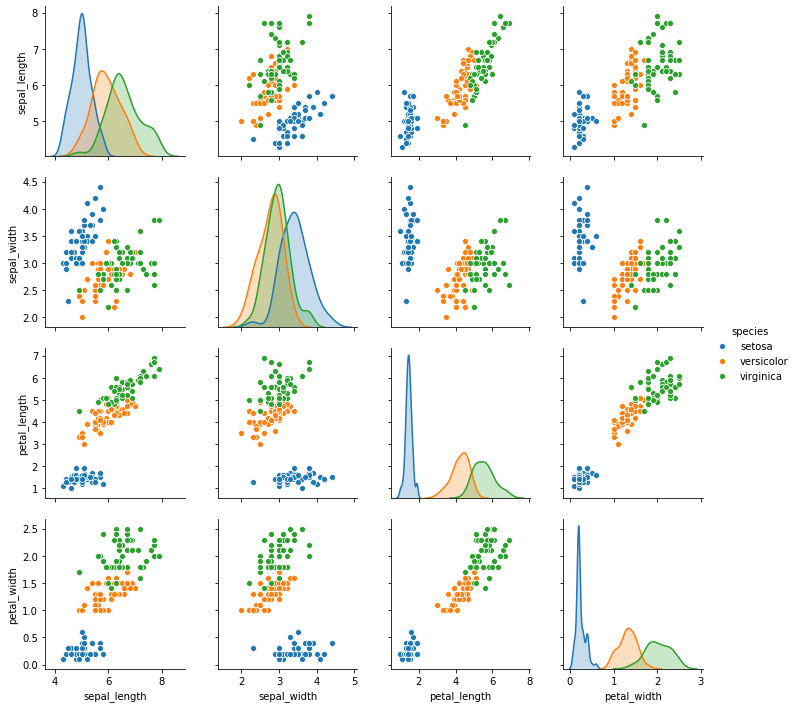

In [4]:
# we'll use seaborn to demo this style of plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn.apionly as sns
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

### Caveats with pairwise mosaics
This only really works for $d<4$, as the number of plots becomes overwhelming for large $d$. It also can only reveal pairwise relationships. There are relationships which are very strong but not visible at all in their pairwise relationships.

In [20]:
x = np.random.normal(0,1,(1000,))
y = np.random.normal(0,1,(1000,))
s = (x+y)

<Figure size 432x288 with 0 Axes>

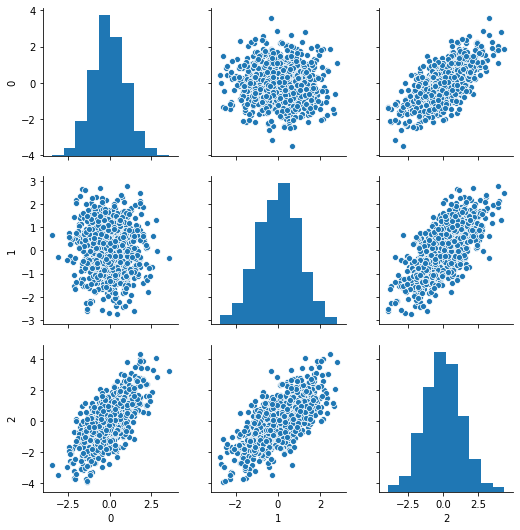

In [21]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
matrix = np.stack([x,y,s]).T
import pandas as pd
g = sns.pairplot(pd.DataFrame(matrix))

<IPython.core.display.Javascript object>


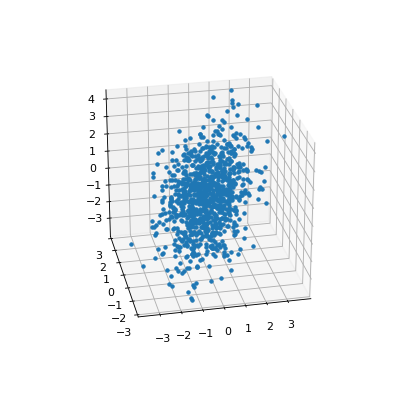

In [24]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot(x,y,s, '.')



## Non-orthogonal plane projection: Principal component analysis
One very simple method of dimensional reduction is *principal component analysis*. This is a linear method; in other words it finds rigid rotations and scalings of the data to project it onto a lower dimension. That is, it finds a matrix $A$ such that $y=Ax$ gives a mapping from $d$ dimensional $x$ to $d^\prime$ dimensional $y$.

The PCA algorithm effectively looks for the rotation that makes the dataset look "fattest" (maximises the variance), chooses that as the first dimension, then removes that dimension, rotates again to make it look "fattest" and repeats. Linear algebra makes it efficient to do this process in a single step by extracting the *eigenvectors* of the *covariance matrix*. 

PCA always finds a matrix $A$ such that $y = Ax$, where the dimension of $y<x$. PCA is exact and repeatable and very efficient, but it can only find rigid transformations of the data. This is a limitation of any linear dimensional reduction technique.




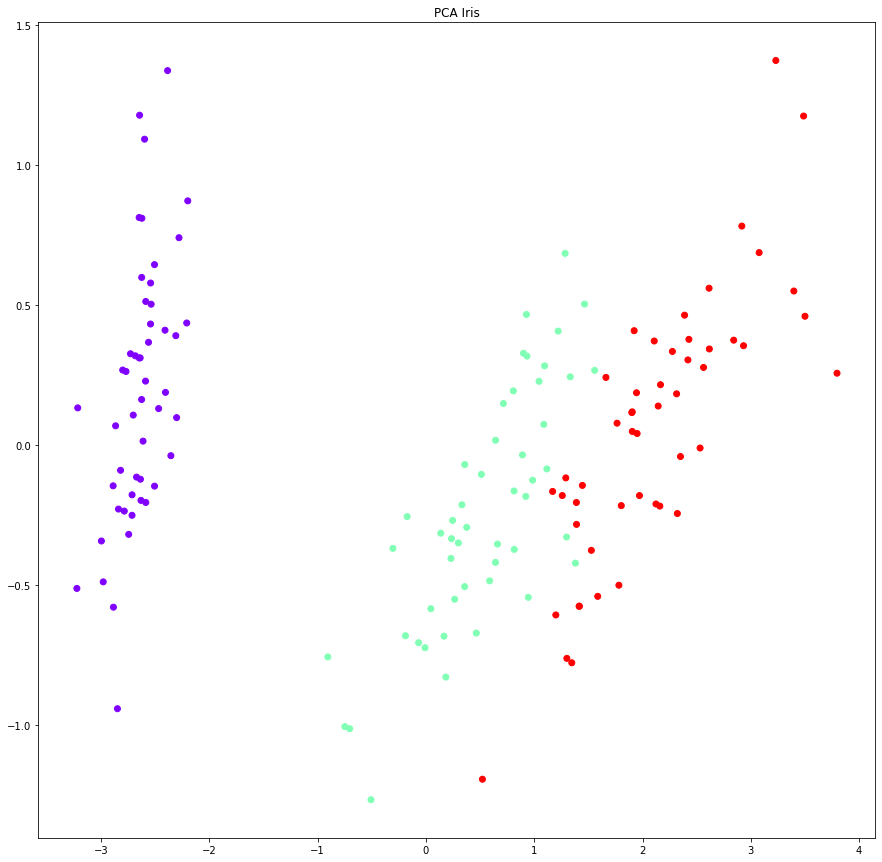

In [21]:
plt.figure(figsize=(15,15))
plt.title("PCA Iris")
iris = sns.load_dataset("iris")

iris_features = np.array(iris.iloc[:,0:4])
iris_labels = iris.iloc[:,4].astype("category").cat.codes

# apply principal component analysis
pca = sklearn.decomposition.PCA(n_components=2).fit(iris_features)
iris_2d = pca.transform(iris_features)

# plot each digit with a different color
plt.scatter(iris_2d[:,0], iris_2d[:,1], c=iris_labels, cmap='rainbow')

### PCA: MNIST Digits
This works even with very high dimensional data, like the 64 dimensions (8x8 grayscale image) vectors of the rescaled MNIST digits.

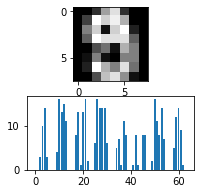

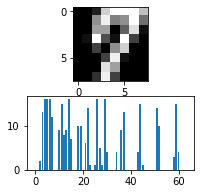

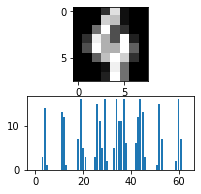

In [80]:
digits = sklearn.datasets.load_digits()
digit_data = digits.data

# plot a single digit data element
def show_digit(d):
    fig = plt.figure(figsize=(3,3))
    ax1 = fig.add_subplot(2,1,1)
    ax1.imshow(d.reshape(8,8), cmap='gray', interpolation='nearest')
    
    ax2 = fig.add_subplot(2,1,2)
    ax2.bar(np.arange(len(d)), d)
    fig.subplots_adjust()
    
# show a couple of raw digits
for i in range(3):
    show_digit(digit_data[np.random.randint(0,1000)])


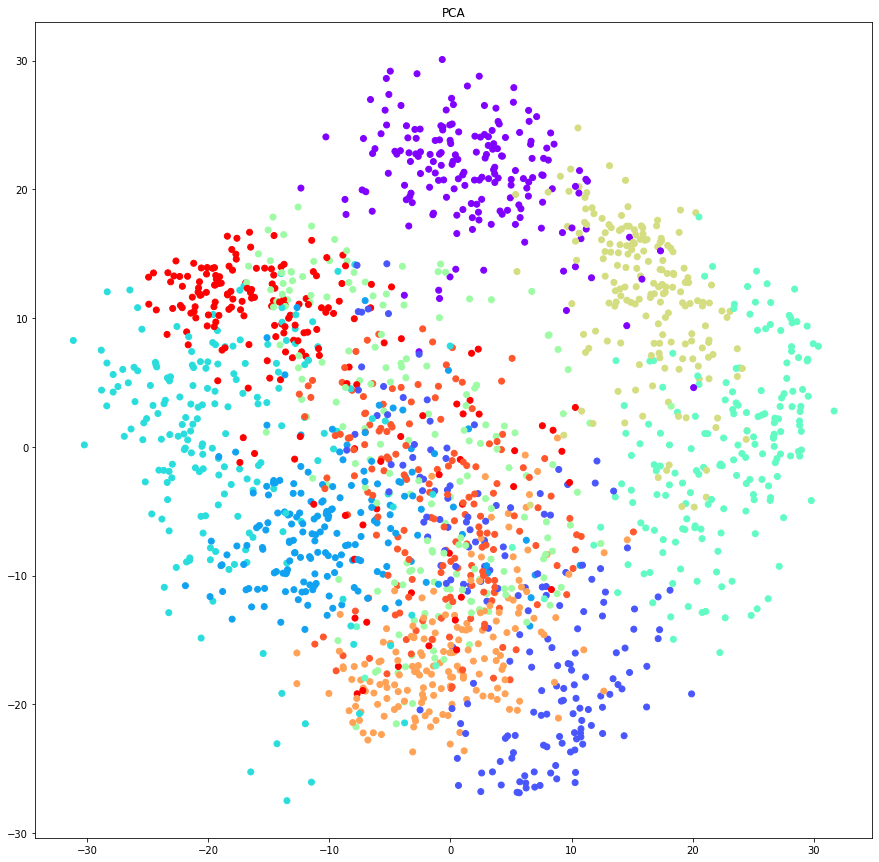

In [81]:
plt.figure(figsize=(15,15))
plt.title("PCA")
# apply principal component analysis
pca = sklearn.decomposition.PCA(n_components=2).fit(digit_data)
digits_2d = pca.transform(digit_data)

# plot each digit with a different color
plt.scatter(digits_2d[:,0], digits_2d[:,1], c=digits.target, cmap='rainbow')

## Explaining the projections
One useful property of PCA is that we compute exactly how "fat" each of these learned dimensions were. The ratio of *explained variance* tells us how much each of the original variation in the dataset is captured by each learned dimension. 

If most of the variance is in the first couple of components, we know that a 2D representation will capture much of the original dataset. If the ratios of variance are spread out over many dimensions, we will need many dimensions to represent the data well. 

Text(0, 0.5, 'Proportion of variance explained')

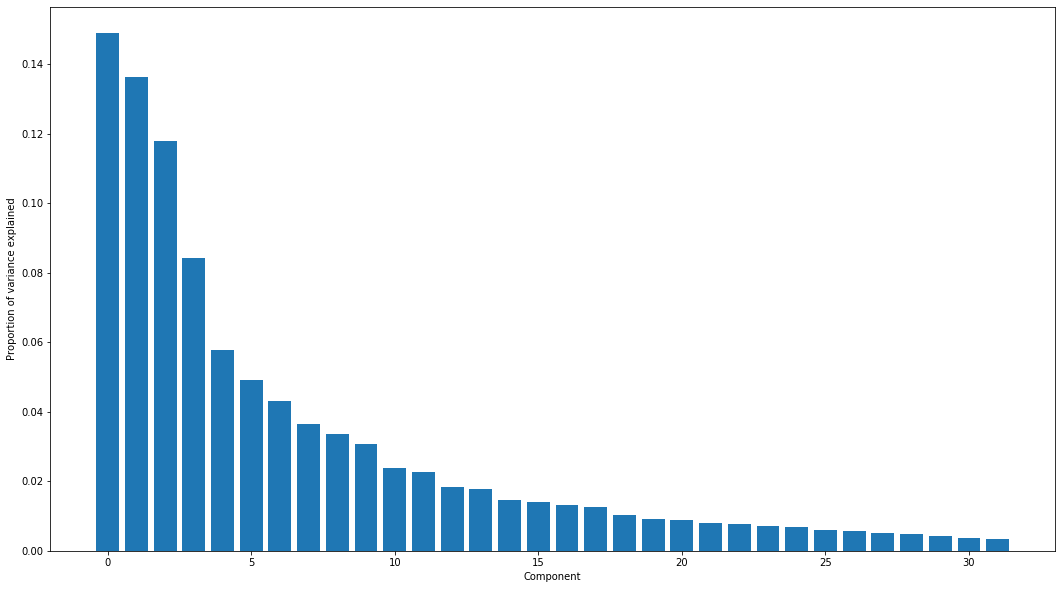

In [24]:
# We can see how many dimensions we need to represent the data well using the eigenspectrum
# here we show the first 32 components
pca = sklearn.decomposition.PCA(n_components=32).fit(digit_data)
plt.bar(np.arange(32), pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Proportion of variance explained")

### Limitations of linearity
One example where PCA does badly is the "swiss roll dataset" -- a plane rolled up into a spiral in 3D. This has a very simple structure; a simple plane with some distortion. But PCA can never unravel the spiral to find this simple explanation because it cannot be unravelled via a linear transformation.

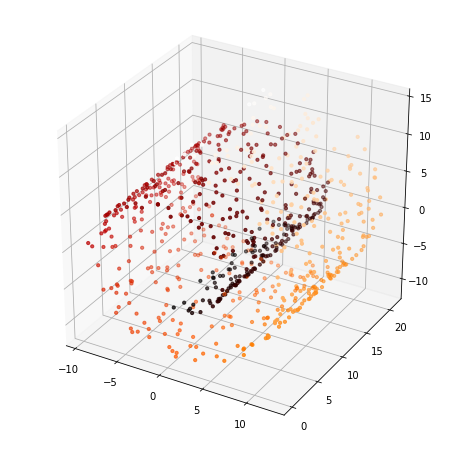

In [34]:
from mpl_toolkits.mplot3d import Axes3D
swiss_pos, swiss_val = sklearn.datasets.make_swiss_roll(800, noise=0.0)
fig = plt.figure(figsize=(8,8))
# make a 3D figure
ax = fig.add_subplot(111, projection="3d")
ax.scatter(swiss_pos[:,0], swiss_pos[:,1], swiss_pos[:,2], c=swiss_val, cmap='gist_heat', s=10)


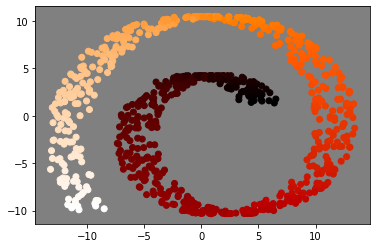

In [35]:
# Apply PCA to learn this structure (which doesn't help much)
plt.figure()
pca = sklearn.decomposition.PCA(2).fit(swiss_pos)
pca_pos = pca.transform(swiss_pos)
plt.scatter(pca_pos[:,0], pca_pos[:,1], c=swiss_val, cmap='gist_heat')
plt.gca().set_facecolor('gray')

## Local linear embeddings -- a roving camera
Imagine instead of projecting onto one *fixed* plane, we had a "camera" we could move around and project small, local neighbourhoods of data points. We could stitch the result together into a patchwork quilt of perspectives, a bit like a cubist painting, where many perspectives are fused into one.

<img src="imgs/braque.jpg">

*Georges Braque, 1910, Portrait of a Woman, Female Figure (Torso Ženy), public domain*

This is the idea behind techniques like **locally linear embeddings** (LLE), which find subspaces near datapoints that are simple projections, and smoothly fuse them together. This can then cope with curving datasets like the swiss roll.

<IPython.core.display.Javascript object>


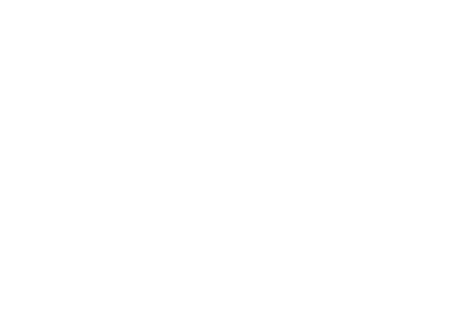

NameError: name 'swiss_pos' is not defined

In [25]:
# LLE plot of the swiss roll
plt.figure()
lle = sklearn.manifold.LocallyLinearEmbedding(12)
lle_pos = lle.fit_transform(swiss_pos)
plt.scatter(lle_pos[:,0], lle_pos[:,1], c=swiss_val, cmap='gist_heat')
plt.gca().set_facecolor('gray')

In [53]:


lle = sklearn.manifold.LocallyLinearEmbedding(48)
iris_2d = lle.fit_transform(iris_features)

# plot each digit with a different color
plt.scatter(iris_2d[:,0], iris_2d[:,1], c=iris_labels, cmap='rainbow')

NameError: name 'iris_features' is not defined

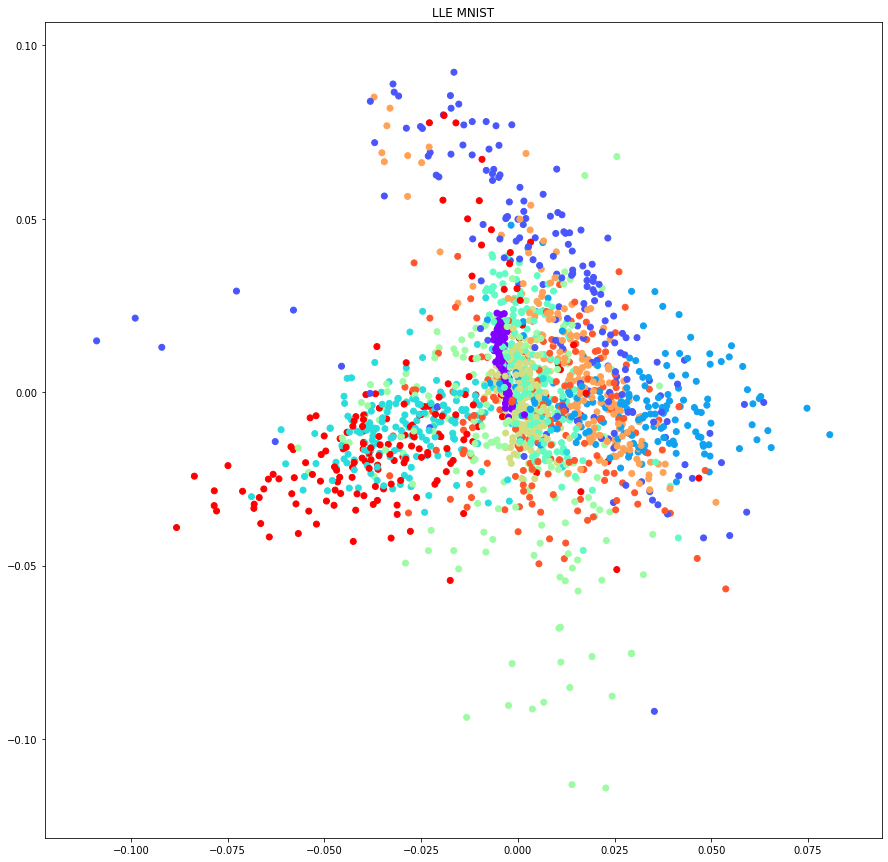

In [40]:
plt.figure(figsize=(15,15))
plt.title("LLE MNIST")
# apply principal component analysis
lle = sklearn.manifold.LocallyLinearEmbedding(38)
digits_2d = lle.fit_transform(digit_data)

# plot each digit with a different color
plt.scatter(digits_2d[:,0], digits_2d[:,1], c=digits.target, cmap='rainbow')

###  Nonlinear manifold learning with neighbourhood graphs
Other approaches to dimensional reduction look at the problem in terms of learning a *manifold*. A *manifold* is a geometrical structure which is *locally like* a low-dimensional Euclidean space. Examples are the plane rolled up in the swiss roll, or a 1D "string" tangled up in a 3D space.  Some manifold approaches attempt to automatically find these smooth embedded structures by examining the local structure of datapoints (often by analysing the nearest neighbour graph of points). This is more flexible than linear dimensional reduction as it can in theory unravel very complex or tangled datasets.  However, the algorithms are usually approximate, they do not give guarantees that they will find a given manifold, and can be computationally intensive to run.

<img src="imgs/knn.png" width="40%">

*Image: k nearest neighbours of a point; considering the neighbours of all points forms a directed graph -- the **neighbourhood graph**.*


A once popular manifold learning algorithm is *ISOMAP* which uses *nearest neighbour graphs* to identify locally connected parts of a dataset and find a transformation to 2D that preserves those neighbourhood graphs.

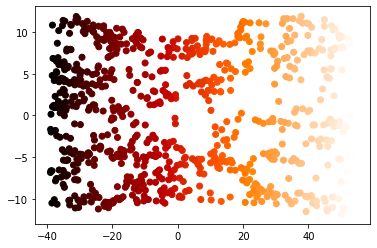

In [57]:
plt.figure()
np.random.seed(2018)
swiss_pos, swiss_val = sklearn.datasets.make_swiss_roll(800, noise=0.0)
isomap_pos = sklearn.manifold.Isomap(n_neighbors=9, n_components=2).fit_transform(swiss_pos)
plt.scatter(isomap_pos[:,0], isomap_pos[:,1], c=swiss_val, cmap='gist_heat')

## Noisy manifolds

Real world data often has noise in it. Mainfold learning algorithms can become confused by noise, either fusing surfaces together that should be distinct, or breaking apart surfaces that ought to be independent of each other. ISOMAP is quite vulnerable to noise:

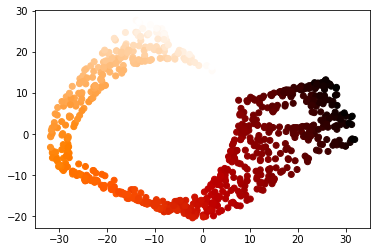

In [63]:
plt.figure()

# note that isomap is sensitive to noise!
noisy_swiss_pos, swiss_val = sklearn.datasets.make_swiss_roll(800, noise=0.5)
isomap_pos = sklearn.manifold.Isomap(n_neighbors=9, n_components=2).fit_transform(noisy_swiss_pos)
plt.scatter(isomap_pos[:,0], isomap_pos[:,1], c=swiss_val, cmap='gist_heat')

In [64]:
isomap  = sklearn.manifold.Isomap(n_neighbors=7)
iris_2d = isomap.fit_transform(iris_features)

# plot each digit with a different color
plt.scatter(iris_2d[:,0], iris_2d[:,1], c=iris_labels, cmap='rainbow')
plt.title("Iris ISOMAP")

NameError: name 'iris_features' is not defined

In [65]:
isomap  = sklearn.manifold.Isomap(n_neighbors=7)
digits_2d = isomap.fit_transform(digit_data)

# plot each digit with a different color
plt.scatter(digits_2d[:,0], digits_2d[:,1], c=digits.target, cmap='rainbow')
plt.title("MNIST ISOMAP")

NameError: name 'digit_data' is not defined

#### ISOMAP: The face-direction example
<a id="isomap"></a>
A popular manifold learning algorithm is *ISOMAP* which uses nearest neighbour graphs to identify locally connected parts of a dataset. This examines local neighbor graphs to find an "unraveling" of the space to a 1D or 2D subspace, which can deal with very warped high-dimensional data, and doesn't get confused by examples like the swiss roll above (assuming parameters are set correctly!).

Let's use ISOMAP (a local neighbours embedding approach) to build a real, working vision based interface.

In [66]:
# load a video of my head in different orientations
face_frames = np.load("data/face_frames.npz")['arr_0']

In [67]:
# show the video in opencv -- it's just a raw sequence of values
# the video is 700 frames of 64x64 imagery
frame_ctr = 0
# play the video back
while frame_ctr<face_frames.shape[1]:
    frame = face_frames[:,frame_ctr].reshape(64,64)
    cv2.imshow('Face video', cv2.resize(frame, (512,512), interpolation=cv2.INTER_NEAREST))
    frame_ctr += 1
    key = cv2.waitKey(1) & 0xff
    if key  == 27:
        break
        
# clean up
cv2.destroyAllWindows()        

In [73]:
# fit isomap to the face data (this takes a few minutes)
faces = face_frames.T
np.random.seed(2019)
isomap = sklearn.manifold.Isomap(n_neighbors=25)
isomap.fit(faces)
xy = isomap.transform(faces)
orig_xy = np.array(xy)

In [74]:
## the following code just plots images on the plot without overlap
overlaps = []

def is_overlap(ra,rb):
    P1X, P2X, P1Y, P2Y = ra
    P3X, P4X, P3Y, P4Y = rb
    
    return not ( P2X <= P3X or P1X >= P4X or P2Y <= P3Y or P1Y >= P4Y )

def overlap_test(r):
    if any([is_overlap(r,rb) for rb in overlaps]):
        return False
    overlaps.append(r)
    return True

def plot_some_faces(xy, faces, thin=1.0, sz=8):
    global overlaps
    overlaps = []
    q = sz/4
    for i in range(len(xy)):
        x, y = xy[i,0], xy[i,1]
        image = faces[i,:].copy()
        
        if np.random.random()<thin:
            for j in range(10):
                x, y = xy[i,0], xy[i,1]
                x += np.random.uniform(-q,q)
                y += np.random.uniform(-q, q)
                x *= q
                y *= q
                extent = [x, x+sz, y, y+sz]
                if overlap_test(extent):                    
                    img = image.reshape(64,64)
                    img[:,0] = 1
                    img[:,-1] = 1
                    img[0,:] = 1
                    img[-1,:] = 1                    
                    plt.imshow(img, vmin=0, vmax=1, cmap="gray",interpolation="lanczos",extent=extent, zorder=100)
                    break

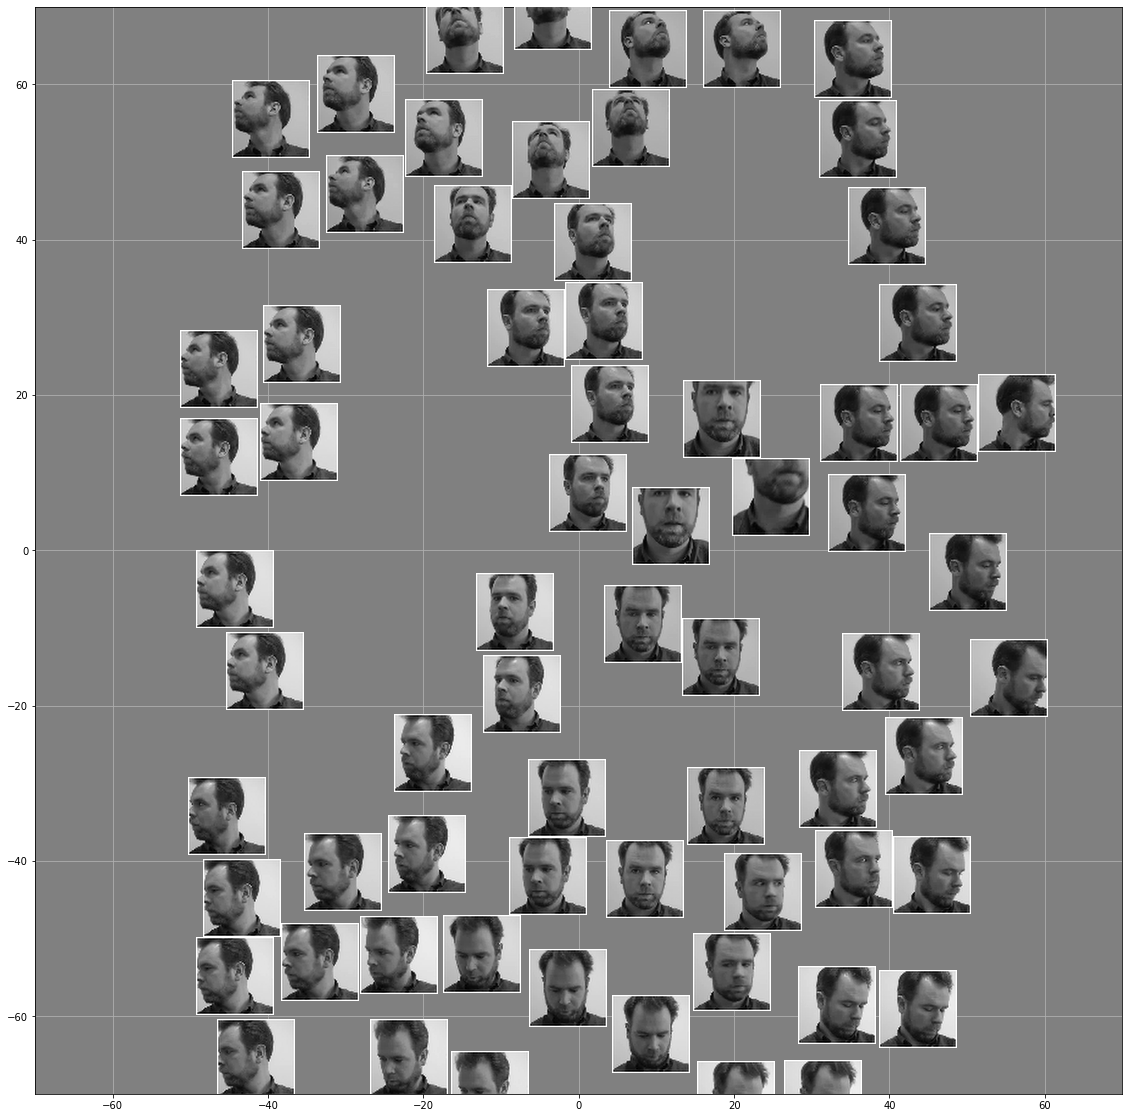

In [75]:
## make a 2D plot of the faces
# tweak co-ordinates

xy[:,0] = -orig_xy[:,0] / 2.5
xy[:,1] = -orig_xy[:,1] 
plt.figure(figsize=(20,20))

# plot the faces
plot_some_faces(xy, faces, sz=10)

# the axes correctly
plt.xlim(np.min(xy[:,0])-10,np.max(xy[:,0])+10)
plt.ylim(np.min(xy[:,1])-10,np.max(xy[:,1])+10)
plt.gca().patch.set_facecolor('gray')
plt.xlim(-70,70)
plt.ylim(-70,70)
plt.grid("off")


In [76]:
frame_ctr = 0
# play the video back, but show the projected dimension on the screen

while frame_ctr<face_frames.shape[1]:
    frame = face_frames[:,frame_ctr].reshape(64,64)
    frame = (frame*256).astype(np.uint8)    
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    xy = isomap.transform([face_frames[:,frame_ctr]])
    cx, cy = 256, 256
    s = 6
    x,y = xy[0]
    y = -y
    resized_frame = cv2.resize(frame, (512,512), interpolation=cv2.INTER_NEAREST)
    cv2.circle(resized_frame, (int(cx-x*s), int(cy-y*s)), 10, (0,255,0), -1)
    
    cv2.imshow('Face video', resized_frame)
    
    frame_ctr += 1
    key = cv2.waitKey(1) & 0xff
    if key  == 27:
        break
        
cv2.destroyAllWindows()

## Self organising maps
<a id="som"></a>

Self-organising maps are a nice half way house between clustering and manifold learning approaches. They create a dense "net" of clusters in the original (high-dimensional space), and force the cluster points to **also** lie in a low-dimensional space with local structure, for example, on a regular 2D grid. This maps a **discretized** low-dimensional space into the high-dimensional space.

The algorithm causes the clusters have local smoothness in both the high and the low dimensional space; it does this by forcing cluster points on the grid to move closer (in the high-d space) to their neighbours (in the low-d grid).

<img src="imgs/somtraining.png"> [Image from https://en.wikipedia.org/wiki/Self-organizing_map]

In other words: **clusters that are close together in the high-dimensional space should be close together in the low dimensional space**. This "unravels" high dimensional structure into a simple low-dimensional approximation.

In [86]:
import som

som_map = som.SOM(12,12,4)
som_map.learn(iris_features, epochs=25000)

Epoch 	 0 /	 25000 	Lrate:0.50	 Sigma:10.00
Epoch 	 500 /	 25000 	Lrate:0.46	 Sigma:8.32
Epoch 	 1000 /	 25000 	Lrate:0.42	 Sigma:6.92
Epoch 	 1500 /	 25000 	Lrate:0.38	 Sigma:5.76
Epoch 	 2000 /	 25000 	Lrate:0.35	 Sigma:4.79
Epoch 	 2500 /	 25000 	Lrate:0.32	 Sigma:3.98
Epoch 	 3000 /	 25000 	Lrate:0.29	 Sigma:3.31
Epoch 	 3500 /	 25000 	Lrate:0.26	 Sigma:2.76
Epoch 	 4000 /	 25000 	Lrate:0.24	 Sigma:2.29
Epoch 	 4500 /	 25000 	Lrate:0.22	 Sigma:1.91
Epoch 	 5000 /	 25000 	Lrate:0.20	 Sigma:1.59
Epoch 	 5500 /	 25000 	Lrate:0.18	 Sigma:1.32
Epoch 	 6000 /	 25000 	Lrate:0.17	 Sigma:1.10
Epoch 	 6500 /	 25000 	Lrate:0.15	 Sigma:0.91
Epoch 	 7000 /	 25000 	Lrate:0.14	 Sigma:0.76
Epoch 	 7500 /	 25000 	Lrate:0.13	 Sigma:0.63
Epoch 	 8000 /	 25000 	Lrate:0.11	 Sigma:0.53
Epoch 	 8500 /	 25000 	Lrate:0.10	 Sigma:0.44
Epoch 	 9000 /	 25000 	Lrate:0.10	 Sigma:0.36
Epoch 	 9500 /	 25000 	Lrate:0.09	 Sigma:0.30
Epoch 	 10000 /	 25000 	Lrate:0.08	 Sigma:0.25
Epoch 	 10500 /	 25000 	Lrate:0.07	 

Text(0.5, 1.0, 'Self organising map: Iris data')

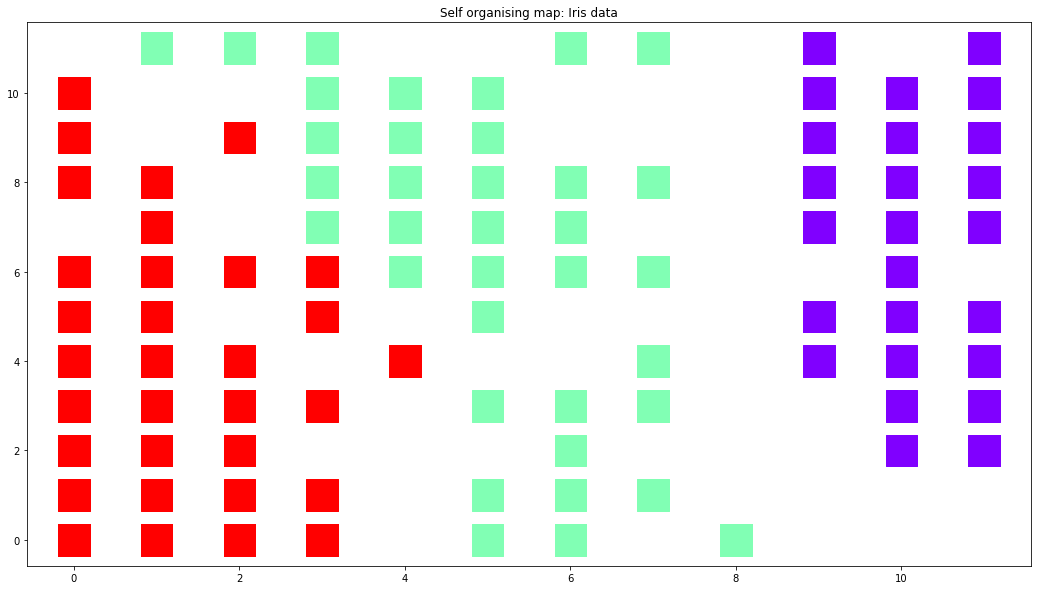

In [96]:

def show_map(som, data, labels):    
    xs = []
    ys = []    
    for d in data:
        x, y = som.classify(d)        
        xs.append(x)
        ys.append(y)
    
    plt.scatter(xs, ys, c=labels, cmap='rainbow', s=1000, marker='s')
    
show_map(som_map, iris_features, iris_labels)
plt.title("Self organising map: Iris data")

In [82]:
## Self organising maps
digits = sklearn.datasets.load_digits()
digits.data -= 8.0

In [83]:
import som

som_map = som.SOM(48,48,64)
som_map.learn(digits.data, epochs=50000)

Epoch 	 0 /	 50000 	Lrate:0.50	 Sigma:10.00
Epoch 	 500 /	 50000 	Lrate:0.48	 Sigma:9.12
Epoch 	 1000 /	 50000 	Lrate:0.46	 Sigma:8.32
Epoch 	 1500 /	 50000 	Lrate:0.44	 Sigma:7.59
Epoch 	 2000 /	 50000 	Lrate:0.42	 Sigma:6.92
Epoch 	 2500 /	 50000 	Lrate:0.40	 Sigma:6.31
Epoch 	 3000 /	 50000 	Lrate:0.38	 Sigma:5.76
Epoch 	 3500 /	 50000 	Lrate:0.36	 Sigma:5.25
Epoch 	 4000 /	 50000 	Lrate:0.35	 Sigma:4.79
Epoch 	 4500 /	 50000 	Lrate:0.33	 Sigma:4.37
Epoch 	 5000 /	 50000 	Lrate:0.32	 Sigma:3.98
Epoch 	 5500 /	 50000 	Lrate:0.30	 Sigma:3.63
Epoch 	 6000 /	 50000 	Lrate:0.29	 Sigma:3.31
Epoch 	 6500 /	 50000 	Lrate:0.27	 Sigma:3.02
Epoch 	 7000 /	 50000 	Lrate:0.26	 Sigma:2.75
Epoch 	 7500 /	 50000 	Lrate:0.25	 Sigma:2.51
Epoch 	 8000 /	 50000 	Lrate:0.24	 Sigma:2.29
Epoch 	 8500 /	 50000 	Lrate:0.23	 Sigma:2.09
Epoch 	 9000 /	 50000 	Lrate:0.22	 Sigma:1.91
Epoch 	 9500 /	 50000 	Lrate:0.21	 Sigma:1.74
Epoch 	 10000 /	 50000 	Lrate:0.20	 Sigma:1.59
Epoch 	 10500 /	 50000 	Lrate:0.19	 

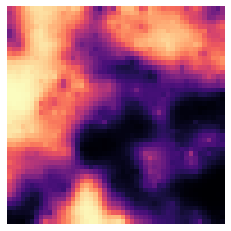

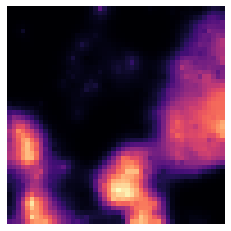

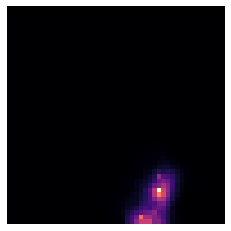

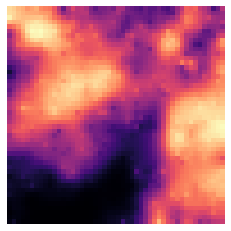

In [84]:
for v in [20,30,40,50]:
    plt.figure()
    plt.imshow(som_map.codebook[:,:,v], cmap="magma", interpolation="nearest")
    plt.axis("off")

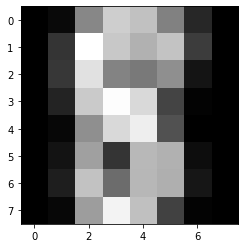

In [85]:
plt.imshow(som_map.codebook[20,20,:].reshape(8,8), cmap="gray", interpolation="nearest")
plt.grid(False)

(0.0, 48.0, 0.0, 48.0)

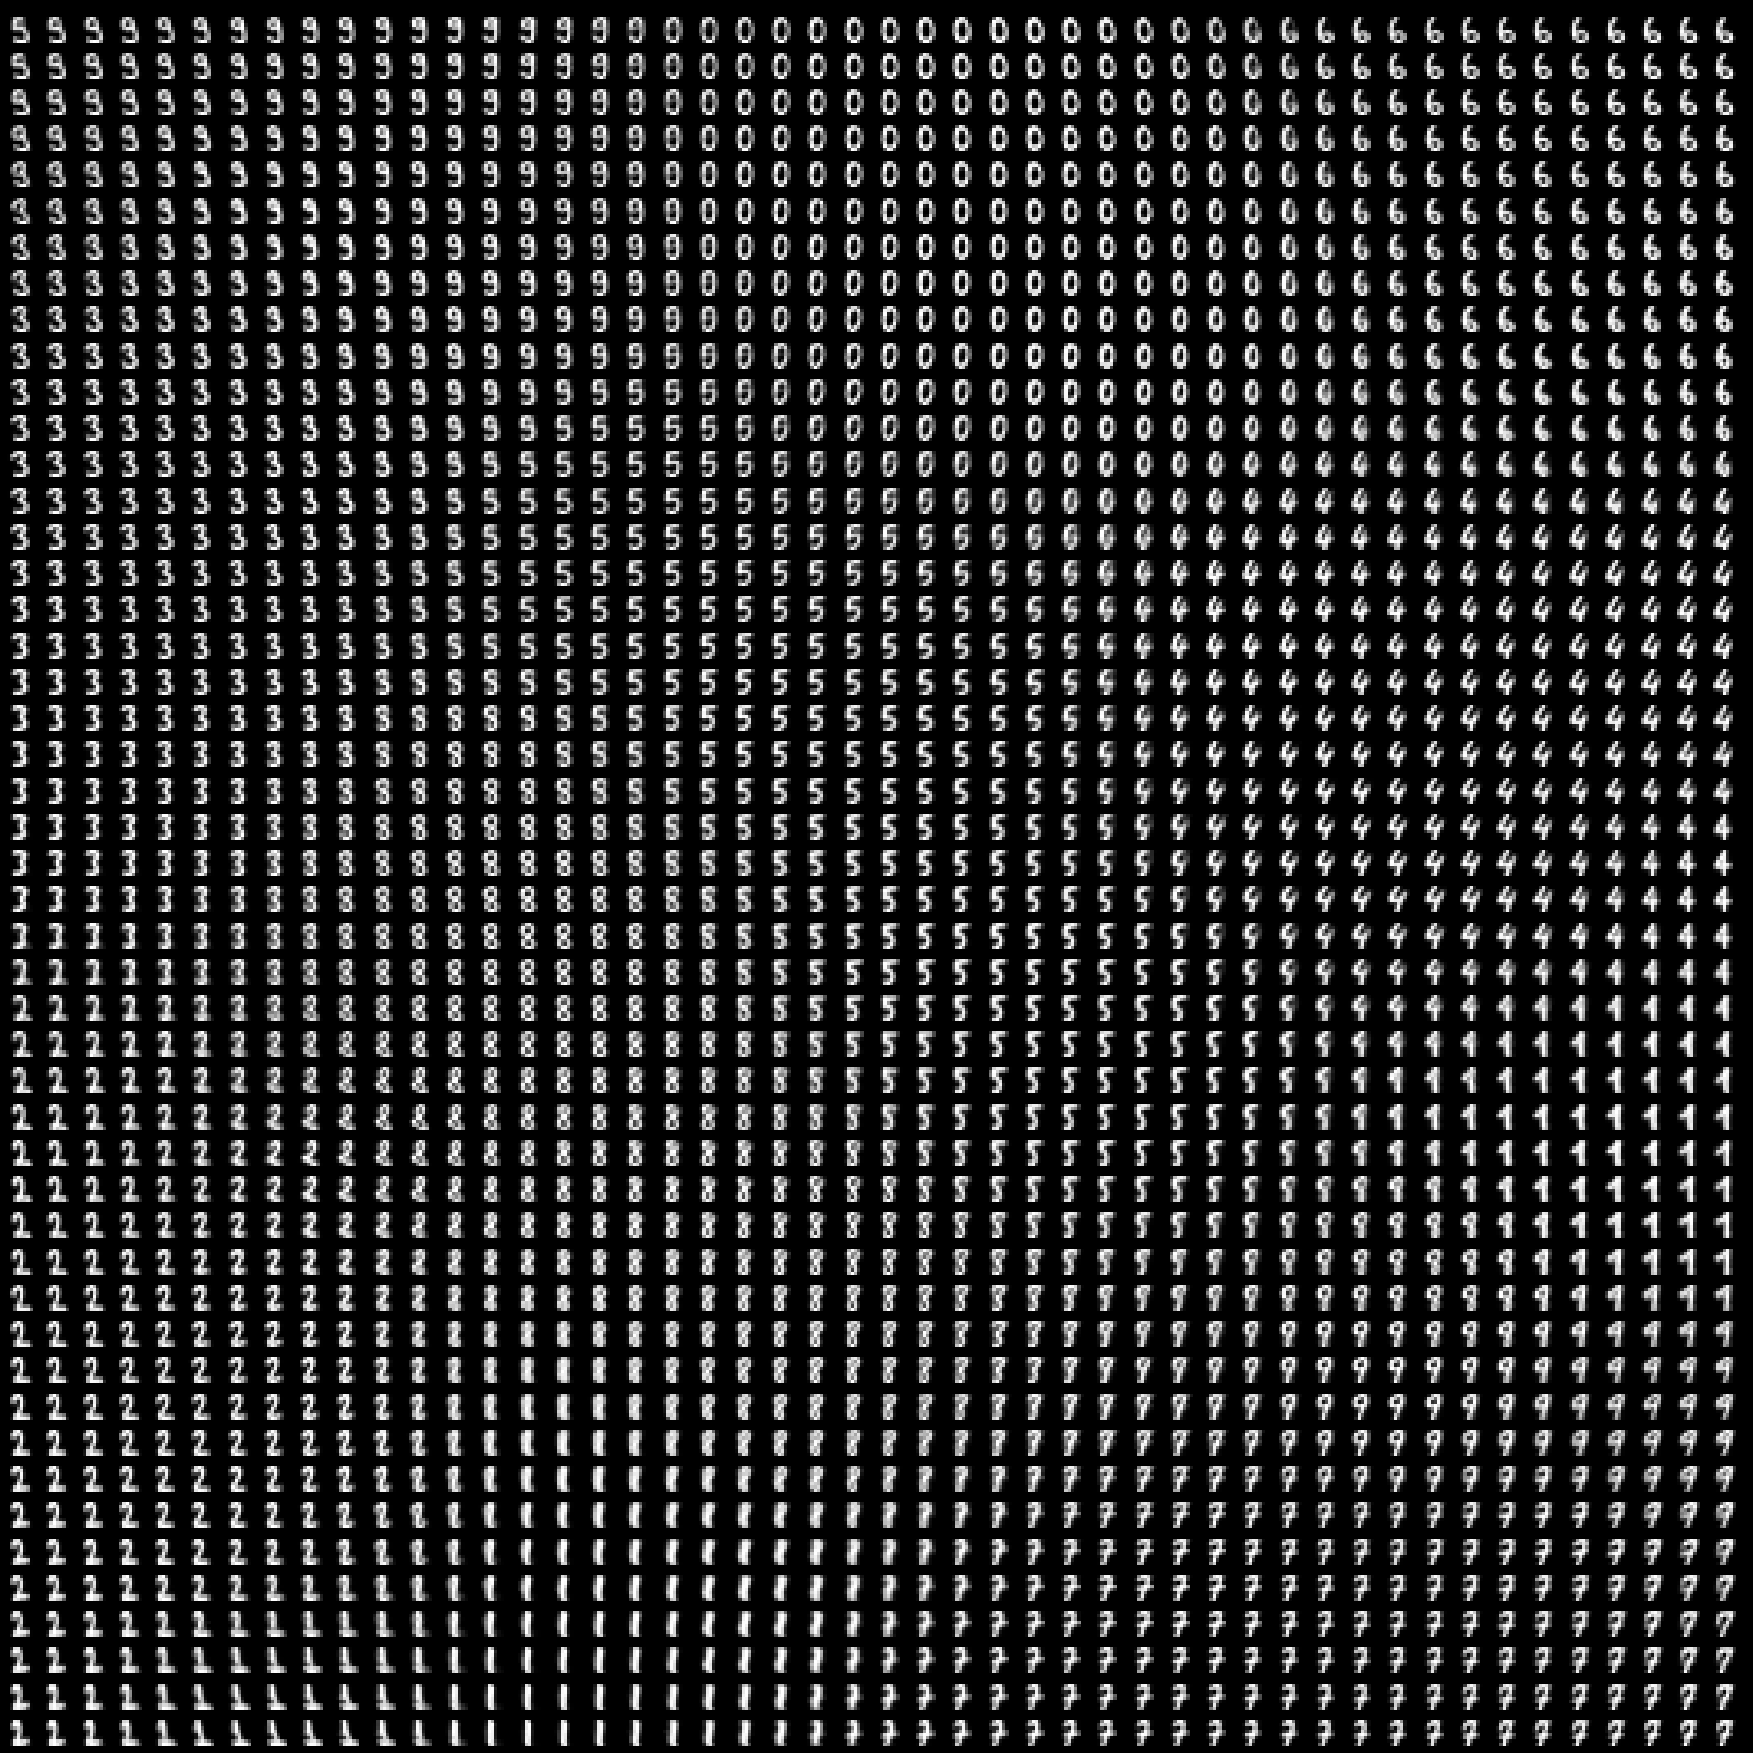

In [90]:
plt.figure(figsize=(32,32))
for i in range(0,48):
    for j in range(0,48):
        img = som_map.codebook[i,j,:].reshape(8,8)        
        plt.imshow(img, cmap="gray", extent=[i,i+0.7,j,j+0.7])
plt.xlim(0,48)
plt.ylim(0,48)
plt.gcf().set_facecolor("black")
plt.axis("off")

## The U-Matrix

One very nice aspect of the self-organsing map is that we can extract the **U-matrix** which captures how close together in the **high-dimensional space** points in the **low-dimensional** map are. This lets us see whether there are natural **partitions** in the layout; wrinkles in the layout that might be good clustering points.

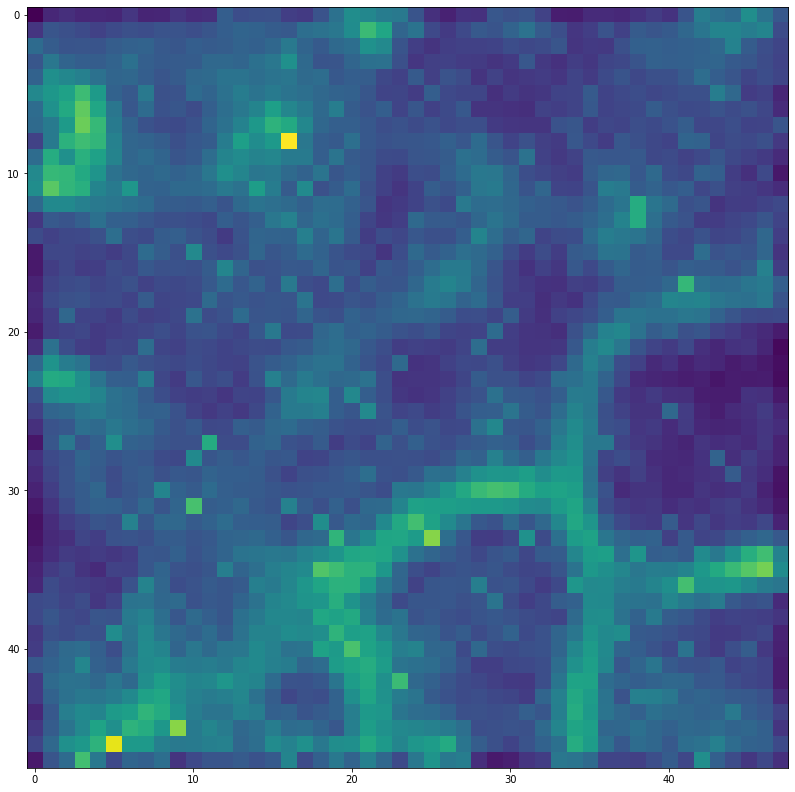

In [92]:
import scipy.spatial.distance

def umatrix(codebook):
    ## take the average HD distance to all neighbours within
    ## certain radius in the 2D distance    
    x_code, y_code = np.meshgrid(np.arange(codebook.shape[0]), np.arange(codebook.shape[1]))
    hdmatrix = codebook.reshape(codebook.shape[0]*codebook.shape[1], codebook.shape[2])    
    hd_distance = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(hdmatrix))**2
    ld_distance = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(np.vstack([x_code.ravel(), y_code.ravel()]).T))
    return np.mean(hd_distance * (np.logical_and(ld_distance>0,ld_distance<1.5)),axis=1).reshape(codebook.shape[0], codebook.shape[1])
    
plt.figure(figsize=(14,14))    
um = umatrix(som_map.codebook)    
plt.imshow(um, interpolation="nearest", cmap="viridis")
plt.grid(False)


#### tSNE
t-SNE *t-distributed stochastic neighbour embedding* is a popular method for nonlinear dimensional reduction. It is again based on neighbourhood graphs, but is particularly effective in reducing high-dimensional data to 2D in a way that protects cluster structure.

It works particularly well for reduction to 2D and can often reveal rich structure in data. The specific details of the algorithm are not critical, but it uses a graph of local neighbours in high-dimensional space to find a layout in low-dimensional space that preserves those neighbourhoods.

For example, we can apply it to the Iris and MNIST dataset to lay out handwritten digits, using the `sklearn` implementation of tSNE.

In [93]:
tsne  = sklearn.manifold.TSNE()
iris_2d = tsne.fit_transform(iris_features)

# plot each digit with a different color
plt.scatter(iris_2d[:,0], iris_2d[:,1], c=iris_labels, cmap='rainbow')
plt.title("Iris tSNE")

NameError: name 'iris_features' is not defined

Text(0.5, 1.0, 'MNIST tSNE')

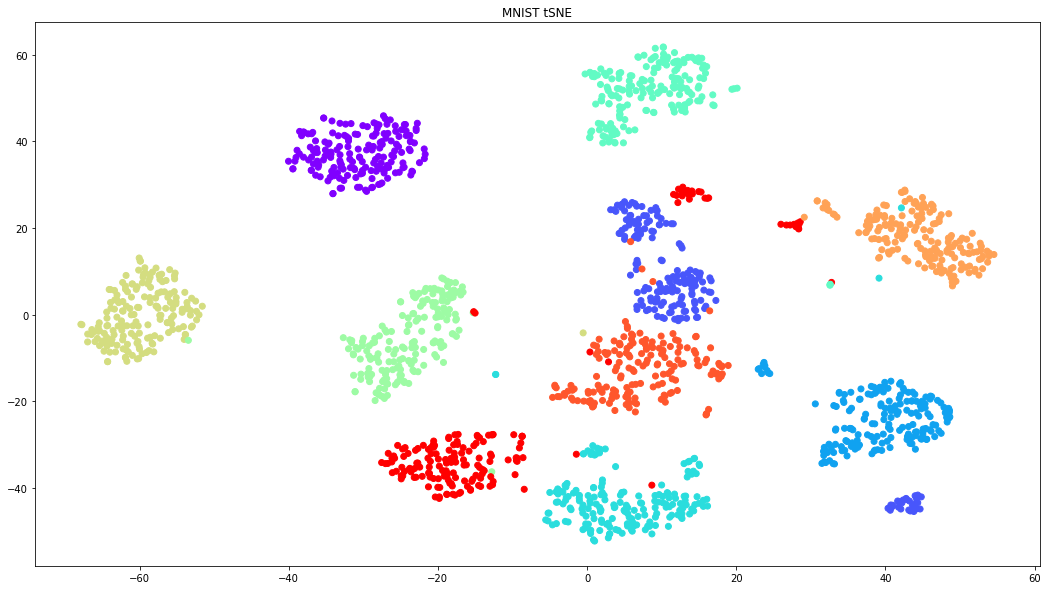

In [105]:
tsne  = sklearn.manifold.TSNE()
digit_2d = tsne.fit_transform(digit_data)

# plot each digit with a different color
plt.scatter(digit_2d[:,0], digit_2d[:,1], c=digits.target, cmap='rainbow')
plt.title("MNIST tSNE")

#### UMAP
UMAP *uniform manifold approximation and projection* is probably the most successful and widely-used dimensional reduction algorithm currently applied. It uses topological techniques to find a reduction from high to low-dimensional space. It tends to provide  a better separation of clusters than tSNE does and it is *much* faster to run. 

If you are interested in how UMAP works, there is a very enlightening lecture on the topic: https://www.youtube.com/watch?v=nq6iPZVUxZU The underlying methods are quite involved, with a measure of computational topology and category theory.

UMAP is available as a Python package, which is as simple to use as `sklearn`.


Text(0.5, 1.0, 'UMAP tSNE')

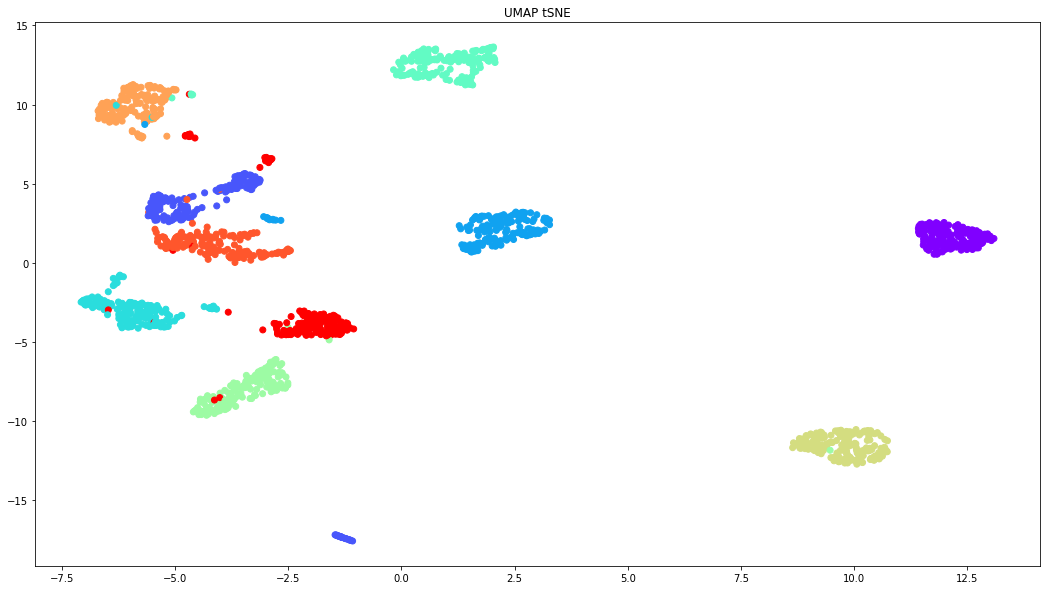

In [109]:
import umap
umap  = umap.UMAP(min_dist=0.2)
digit_2d = umap.fit_transform(digit_data)

# plot each digit with a different color
plt.scatter(digit_2d[:,0], digit_2d[:,1], c=digits.target, cmap='rainbow')
plt.title("UMAP tSNE")

### Visualising the natural numbers
We can visualise **really** high-dimensional datasets with UMAP, something which is hard to do efficiently with other dimensional reduction problems. 


For example, take every natural number less than a million. Write each number as a binary vector indicating the presence of each possible prime factor. This results in a 1000000 x 78628 matrix, where each number is a a vector in 78628 dimensional space.

* for each i up to n
* find prime factors of i.
* For each i, make binary vector with π(n) columns (π(n) = number of primes less than n), where each element has 1=prime factor present, 0=absent.
* Stack all vectors into a large, sparse matrix

This is a way of representing a numbers in vector space, which we can visualise with dimensional reduction.

For example, for `n=11`, the matrix looks like:


             2  3  5  7  11       
            [0. 0. 0. 0. 0.] 0
            [0. 0. 0. 0. 0.] 1
            [1. 0. 0. 0. 0.] 2
            [0. 1. 0. 0. 0.] 3
            [1. 0. 0. 0. 0.] 4
            [0. 0. 1. 0. 0.] 5
            [1. 1. 0. 0. 0.] 6
            [0. 0. 0. 1. 0.] 7
            [1. 0. 0. 0. 0.] 8
            [0. 1. 0. 0. 0.] 9
            [1. 0. 1. 0. 0.] 10
            [0. 0. 0. 0. 1.] 11
            
            
Each row represents one integer. Each column represents the presence or absence of the prime factor for that integer. If we then expand to one million numbers, we get a very sparse collection of points, which we can reduce down to 2D to display.



<img src="imgs/primes_umap_1e6_contrast_enhanced.png">

See [What do numbers look like](https://johnhw.github.io/umap_primes/index.md.html) for a full explanation.


### Clustering as exploratory visualisation

Clustering tries to find well-seperated (in some sense) **partitions** of a data set. It is essentially a search for natural boundaries in the data. 


<img src="imgs/cluster_img.png">

There are many, *many* clustering approaches. A simple one is *k-means*, which finds clusters via an iterative algortihm, moving clusters slightly towards their "local center" in each step. The number of clusters must be chosen in advance. In general, it is hard to estimate the number of clusters, although there are algorithms for estimating this. k-means proceeds by choosing a set of $k$ random points as initial cluster seed points; classifiying each data point according to its nearest seed point; then moving the cluster point towards the mean position of all the data points that belong to it. 

The k-means algorithm does not guarantee to find the best possible clustering -- it falls into *local minima*. But it often works very well.

<img src="imgs/cluster_boundary.png">

<Figure size 432x288 with 0 Axes>

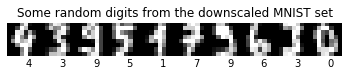

<Figure size 432x288 with 0 Axes>

In [94]:
digits = sklearn.datasets.load_digits()
digit_data = digits.data


selection = np.random.randint(0,200,(10,))

digit_seq = [digit_data[s].reshape(8,8) for s in selection]
plt.imshow(np.hstack(digit_seq), cmap="gray", interpolation="nearest")
for i, d in enumerate(selection):    
    plt.text(4+8*i,10,"%s"%digits.target[d])
plt.axis("off")
plt.title("Some random digits from the downscaled MNIST set")
plt.figure()

<Figure size 432x288 with 0 Axes>

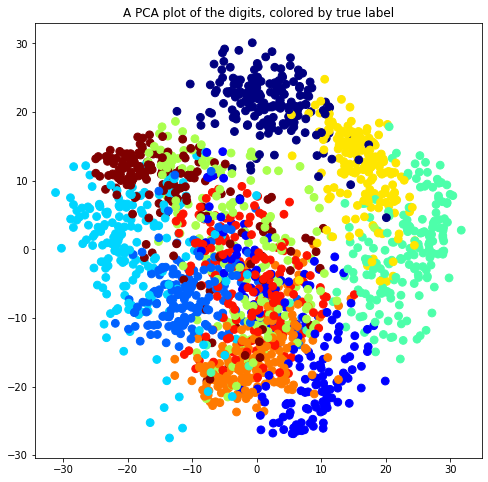

<Figure size 432x288 with 0 Axes>

In [101]:
# apply principal component analysis
pca = sklearn.decomposition.PCA(n_components=2).fit(digit_data)
digits_2d = pca.transform(digit_data)
plt.figure(figsize=(8,8))
# plot each digit with a different color (these are the true labels)
plt.scatter(digits_2d[:,0], digits_2d[:,1], c=digits.target, cmap='jet', s=60)
plt.title("A PCA plot of the digits, colored by true label")
# show a few random draws from the examples, and their labels
plt.figure()

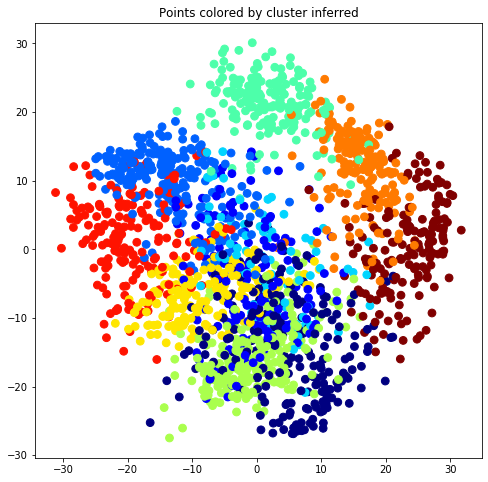

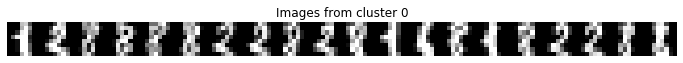

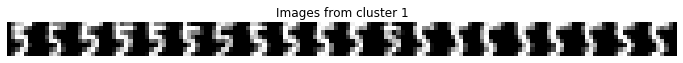

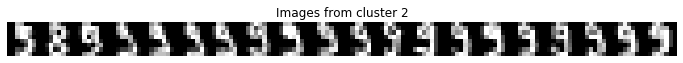

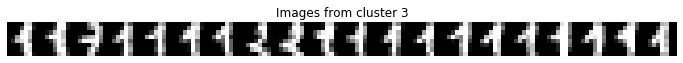

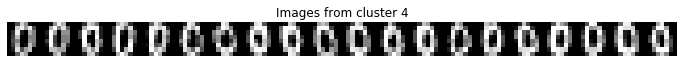

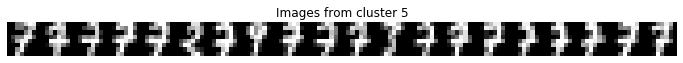

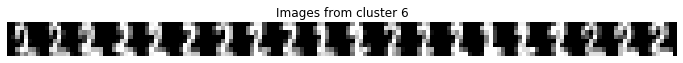

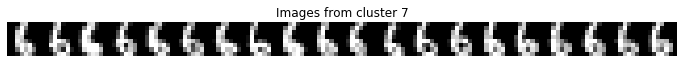

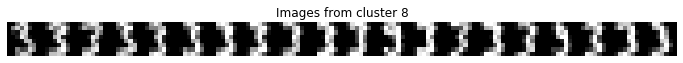

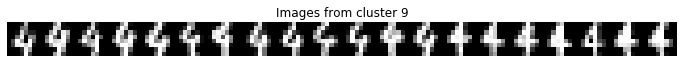

In [100]:
## now cluster the data
kmeans = sklearn.cluster.KMeans(n_clusters=10)
plt.figure(figsize=(8,8))
kmeans_target = kmeans.fit_predict(digits.data)
plt.scatter(digits_2d[:,0], digits_2d[:,1], c=kmeans_target, cmap='jet', s=60)
plt.title("Points colored by cluster inferred")

# plot some items in the same cluster
# (which should be the same digit or similar!)
def plot_same_target(target):
    plt.figure(figsize=(12, 1))
    selection = np.where(kmeans_target==target)[0][0:20]
    digit_seq = [digit_data[s].reshape(8,8) for s in selection]
    plt.imshow(np.hstack(digit_seq), cmap="gray", interpolation="nearest")
    #for i, d in enumerate(selection):    
    #    plt.text(4+8*i,10,"%s"%digits.target[d])
    plt.axis("off")
    plt.title("Images from cluster %d" % target)
    
for i in range(10):    
    plot_same_target(i)    


c:\local\conda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


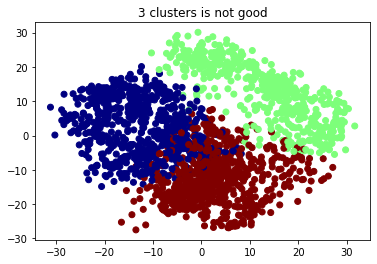

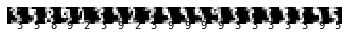

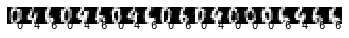

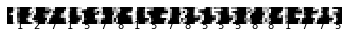

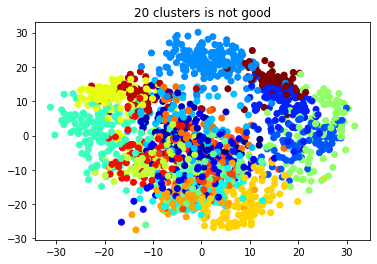

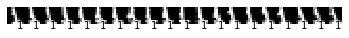

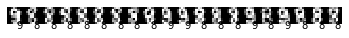

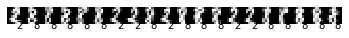

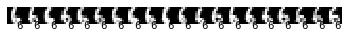

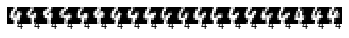

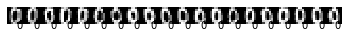

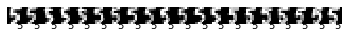

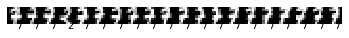

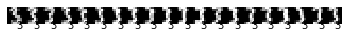

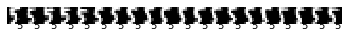

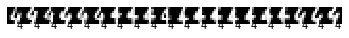

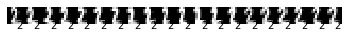

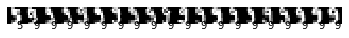

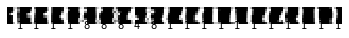

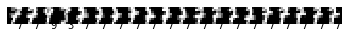

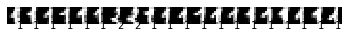

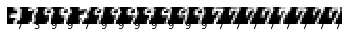

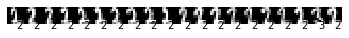

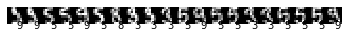

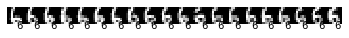

In [102]:
## now cluster the data, but do it with too few and too many clusters

for clusters in [3,20]:
    plt.figure()
    kmeans = sklearn.cluster.KMeans(n_clusters=clusters)
    kmeans_target = kmeans.fit_predict(digits.data)
    plt.scatter(digits_2d[:,0], digits_2d[:,1], c=kmeans_target, cmap='jet')
    plt.title("%d clusters is not good" % clusters)
    # plot some items in the same cluster
    # (which should be the same digit or similar!)
    def plot_same_target(target):
        plt.figure()
        selection = np.random.permutation(np.where(kmeans_target==target))[0][0:20]
        digit_seq = [digit_data[s].reshape(8,8) for s in selection]
        plt.imshow(np.hstack(digit_seq), cmap="gray", interpolation="nearest")
        for i, d in enumerate(selection):    
            plt.text(4+8*i,10,"%s"%digits.target[d])
        plt.axis("off")

    for i in range(clusters):
        plot_same_target(i)    



## Worked example: clustering images
Using a clustering algorithm w ecan to cluster a set of images of street footage, some filmed at night, some during the day. We can use the **color histogram** as a way of summarising the colours in an image, disregarding geometry entirely.

This essentially splits the color space into coarse bins, and counts the occurence of each color type. You need to choose a value for $n$ (number of bins per channel) for the histogram; smaller numbers (like 3 or 4) are usually good.




In [125]:
def color_histogram(img, n):
    """Return the color histogram of the 2D color image img, which should have dtype np.uint8
    n specfies the number of bins **per channel**. The histogram is computed in YUV space. """
    # compute 3 channel colour histogram using openCV
    # we convert to YCC space to make the histogram better spaced
    chroma_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)         
    # compute histogram and reduce to a flat array
    return np.log(cv2.calcHist([chroma_img.astype(np.uint8)], channels=[0,1,2], 
                        mask=None, histSize=[n,n,n], ranges=[40,180,40,180,40,180]).ravel()+1)
    

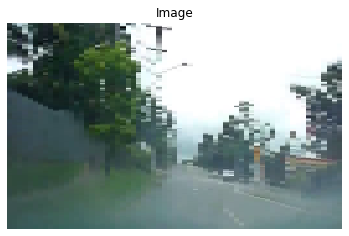

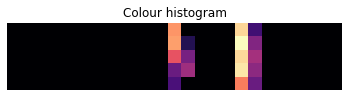

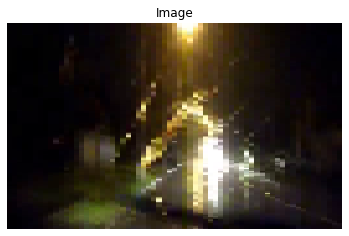

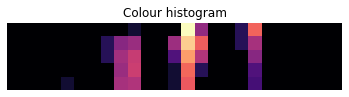

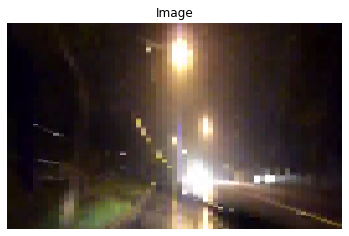

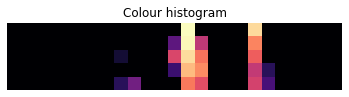

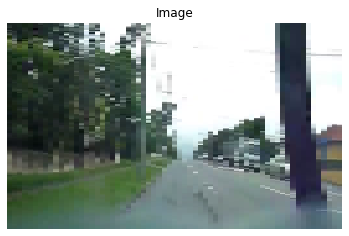

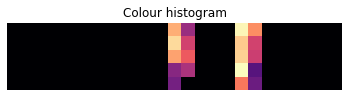

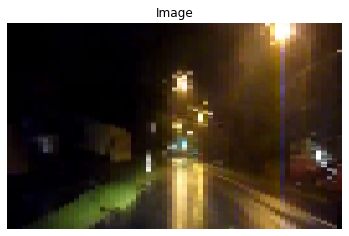

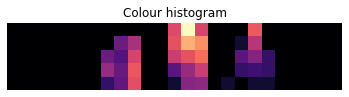

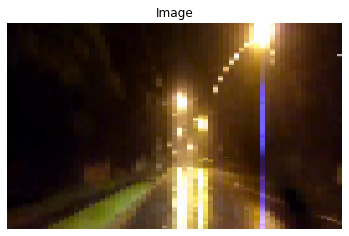

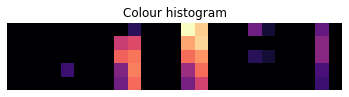

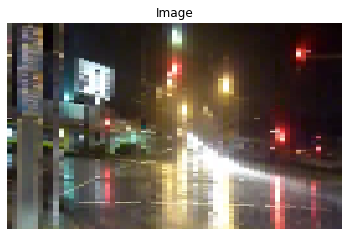

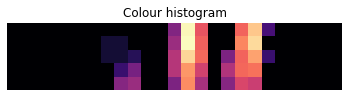

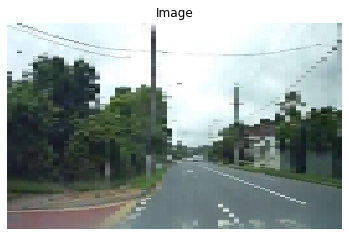

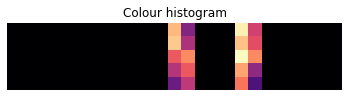

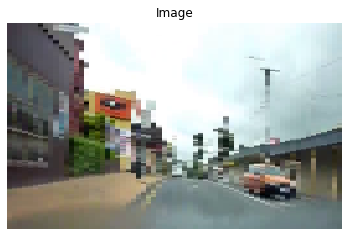

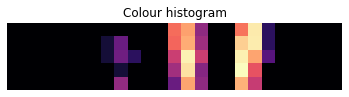

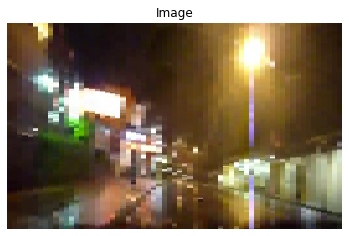

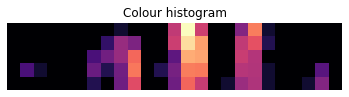

In [135]:
images = np.load("data/daynight.npz")['data']
for i in range(10):
    plt.figure()
    plt.imshow(cv2.cvtColor(images[i,:,:,:], cv2.COLOR_BGR2RGB))
    plt.title("Image")
    
    plt.grid(False)
    plt.axis("image")
    plt.gca().set_aspect(0.25)
    plt.axis("off")
    
    hist = color_histogram(images[i,...], 5).reshape(5,-1)
    plt.figure()
    plt.imshow(hist, cmap='magma')
    plt.axis("off")
    plt.title("Colour histogram")

    

In [136]:
n_clusters = 2

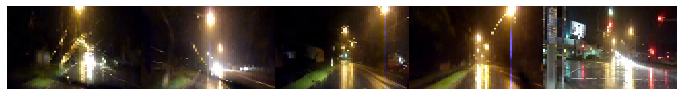

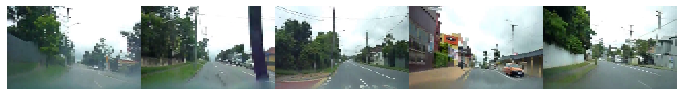

In [137]:
images = np.load("data/daynight.npz")['data']

kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
features= []
for i in range(images.shape[0]):
      features.append(color_histogram(images[i,:,:,:], 3))


features = np.array(features)
kmeans = sklearn.cluster.KMeans(n_clusters)
kmeans_target = kmeans.fit_predict(features)
for i in range(n_clusters):
    plt.figure(figsize=(12,4))
    selection = np.random.permutation(np.where(kmeans_target==i))[0][0:5]
    
    plt.imshow(cv2.cvtColor(np.hstack(images[selection,:,:,:]), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.gca().set_aspect(0.25)

## Exploratory visualisation: conclusions

Exploratory visualisation:

* can be used to visualise raw data (e.g. plot images) as a sanity check before beginning an ML task. This is useful to verify basic properties, like correct normalisation or appropriate array-shaping. 
* can be used to visualise low-dimensional representations of high-dimensional vector spaces, using techniques like PCA or UMAP, to build intuiton about the structure of the datasets we are working with. These approximations offer insight about the local structure of otherwise opaque datasets.

Exploratory visualisation is an essential tool in mapping out possibilities and iterating over representations and transformations that could be used to build machine learning systems.